In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# 1 Получение данных и их загрузка в датафрейм

In [4]:
raw_data = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)
print(raw_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
raw_df = pd.DataFrame(raw_data['data'], columns=raw_data.feature_names)
raw_df['MedHouseVal'] = raw_data['target']
raw_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2 Проверка данных на наличие пропусков

In [6]:
raw_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропуски в данных отсутствуют

# 3 Разделение выборки на обучающее и тестовое подмножество

# 4.	Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

Напиши функцию get_score(), которая будет включать в себя разбиение выборки на обучающее и тестовое подмножество, а также эта функция будет подсчитывать: R2 score и MSE

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def get_quality_metrics(X, y, random_seed=0, model=None, evaluate_on_train=False):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train)
    
    if evaluate_on_train:
        X_eval, y_eval = X_train_scaled, y_train
    else:
        X_eval, y_eval = X_test_scaled, y_test

    y_pred = model.predict(X_eval) 

    score_r2 = model.score(X_eval, y_eval) 
    mse = mean_absolute_error(y_eval, y_pred)
    return score_r2, mse


In [ ]:
# 

In [21]:
X = raw_df.drop('MedHouseVal', axis=1)
y = raw_df['MedHouseVal']

r2_score, mse_score = get_quality_metrics(X, y)
print(f'Линейная модель без настройки признаков:\nR2 score: {r2_score:.4f}\nMSE: {mse_score:.4f}')

Линейная модель без настройки признаков:
R2 score: 0.5943
MSE: 0.5351


# 5.	Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

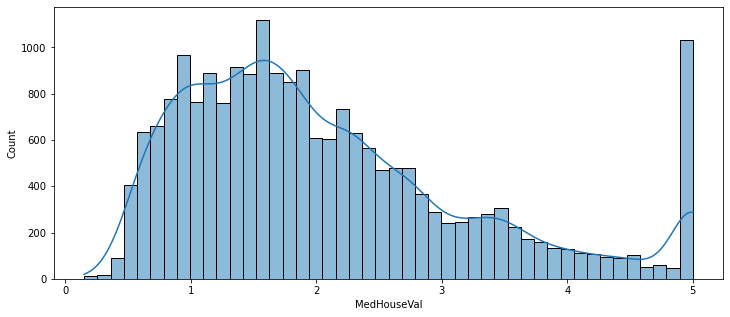

In [61]:
# Плотность распределения целевой переменной
plt.figure(figsize=(12, 5))
sns.histplot(y, kde=True);

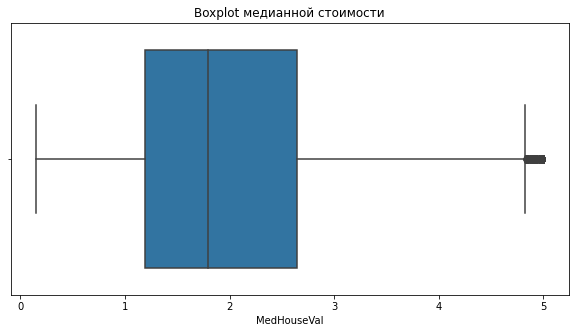

In [64]:

# Ящик с усами
plt.figure(figsize=(10,5))
sns.boxplot(y)
plt.title('Boxplot медианной стоимости')
plt.show()

Видим, выбросы в районе 5 ед. Помимо того, что это выбросы, предполагаю, что все квартиры от 5 ед и выше были помещены в эту группу.

С учётом особенностей предсказательной модели, усечённые значения могут исказить результаты прогноза. Ввиду этого, я принимаю решение об исключении таких наблюдений из анализируемой выборки.

Исключим выбросы на основе межквартильного размаха (1.5 IQR)

In [70]:
# Вычисление квантили
Q1 = raw_df['MedHouseVal'].quantile(0.25)
Q3 = raw_df['MedHouseVal'].quantile(0.75)


# IQR
IQR = Q3 - Q1

# Определение границ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
data = raw_df[(raw_df['MedHouseVal'] >= lower_bound) & (raw_df['MedHouseVal'] <= upper_bound)]

Распределение после удаления выбросов

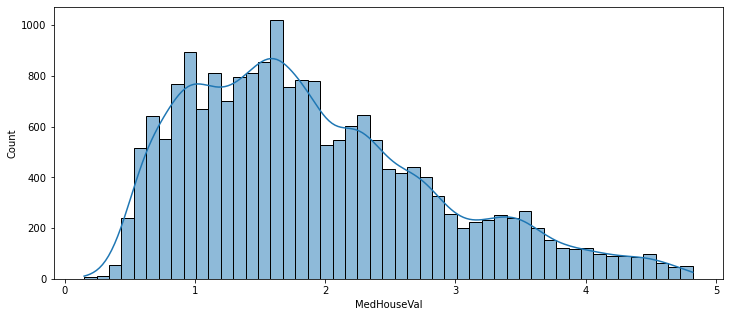

In [73]:
# Плотность распределения целевой переменной
plt.figure(figsize=(12, 5))
sns.histplot(data.MedHouseVal, kde=True);

# 6.	Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

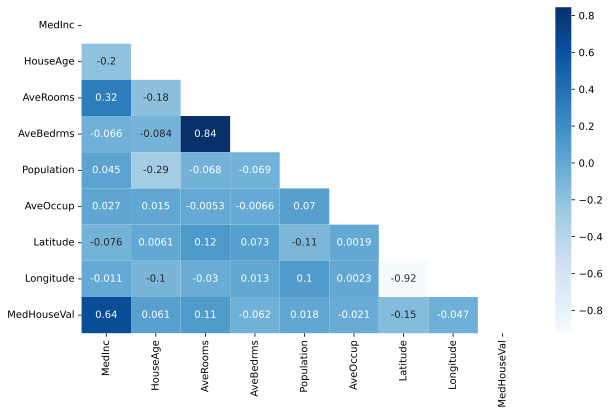

In [96]:
import numpy as np

%config InlineBackend.figure_format = 'svg'


# Маска для скрытия верхнего треугольника
mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues')
plt.show()

In [97]:
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.197628,0.323655,-0.065890,0.045413,0.026600,-0.076249,-0.010808,0.644267
HouseAge,-0.197628,1.000000,-0.180722,-0.084288,-0.294893,0.015196,0.006104,-0.101691,0.061480
AveRooms,0.323655,-0.180722,1.000000,0.843587,-0.068318,-0.005290,0.122028,-0.029953,0.108223
AveBedrms,-0.065890,-0.084288,0.843587,1.000000,-0.069293,-0.006630,0.073492,0.013189,-0.062205
Population,0.045413,-0.294893,-0.068318,-0.069293,1.000000,0.070102,-0.114359,0.101638,0.017764
AveOccup,0.026600,0.015196,-0.005290,-0.006630,0.070102,1.000000,0.001871,0.002326,-0.020971
Latitude,-0.076249,0.006104,0.122028,0.073492,-0.114359,0.001871,1.000000,-0.924031,-0.149100
Longitude,-0.010808,-0.101691,-0.029953,0.013189,0.101638,0.002326,-0.924031,1.000000,-0.047342
MedHouseVal,0.644267,0.061480,0.108223,-0.062205,0.017764,-0.020971,-0.149100,-0.047342,1.000000


Мультиколлинеарность: Если два или более признака сильно коррелированы между собой, они могут вызвать проблемы мультиколлинеарности в некоторых моделях машинного обучения, таких как линейная регрессия. В этом датасете признаки 'AveRooms' и 'AveBedrms' имеют очень высокую положительную корреляцию (0.843587), что может указывать на мультиколлинеарность. В этом случае можно рассмотреть возможность удаления одного из этих признаков.

Удалю количество спальлных мест, так как он меньше коррелирует с таргетом. 

In [99]:
data = data.drop('AveBedrms', axis=1)

In [101]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

r2_score, mse_score = get_quality_metrics(X, y)
print(f'Линейная модель без настройки признаков:\nR2 score: {r2_score:.4f}\nMSE: {mse_score:.4f}')

Линейная модель без настройки признаков:
R2 score: 0.5687
MSE: 0.4766


In [102]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

In [105]:
def get_boxplot(X, columns):
    for i in columns:
        sns.boxplot(x=X[i])
        plt.show()
        
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df



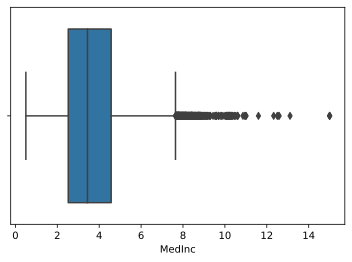

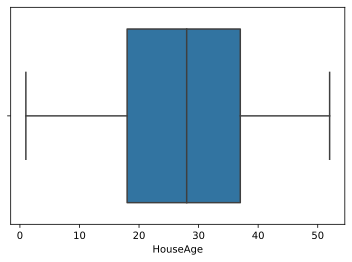

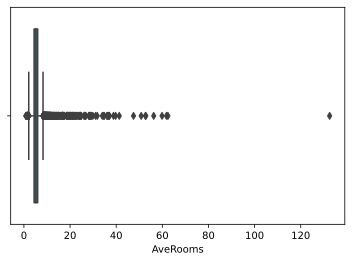

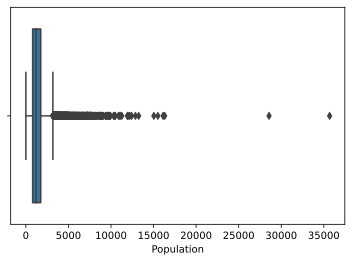

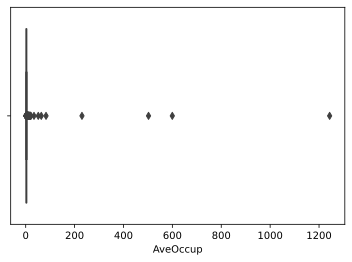

In [107]:
get_boxplot(X, columns=['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'])

In [108]:
cleaned_df = remove_outliers(data, columns=['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'])

In [110]:
X = cleaned_df.drop('MedHouseVal', axis=1)
y = cleaned_df['MedHouseVal']

r2_score, mse_score = get_quality_metrics(X, y)
print(f'Линейная модель без настройки признаков:\nR2 score: {r2_score:.4f}\nMSE: {mse_score:.4f}')

Линейная модель без настройки признаков:
R2 score: 0.6205
MSE: 0.4361


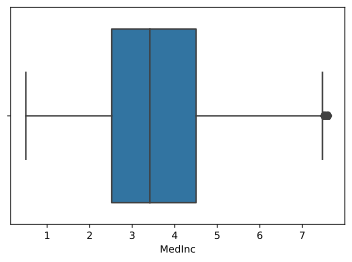

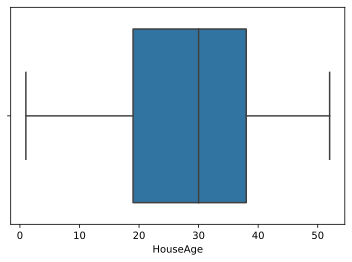

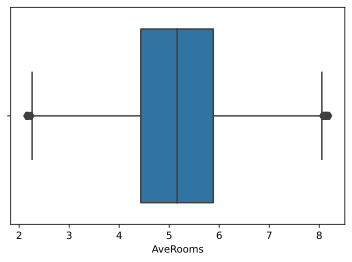

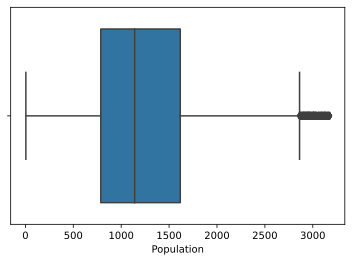

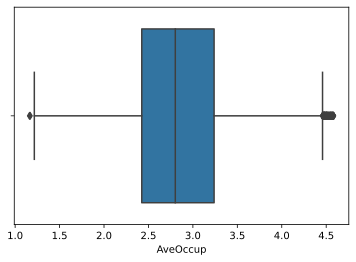

In [111]:
get_boxplot(X, columns=['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'])

# 8.	Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
# a. Повторите п. 3, п. 4 на измененных данных.


In [116]:
# Вычисляем логарифм для 'MedInc'
cleaned_df['log_MedInc'] = np.log(cleaned_df['MedInc'])

# Возводим 'HouseAge' в квадрат
cleaned_df['squared_HouseAge'] = np.square(cleaned_df['HouseAge'])

# Извлекаем квадратный корень из 'AveRooms'
cleaned_df['sqrt_AveRooms'] = np.sqrt(cleaned_df['AveRooms'])

In [117]:
X = cleaned_df.drop('MedHouseVal', axis=1)
y = cleaned_df['MedHouseVal']

r2_score, mse_score = get_quality_metrics(X, y)
print(f'Линейная модель без настройки признаков:\nR2 score: {r2_score:.4f}\nMSE: {mse_score:.4f}')

Линейная модель без настройки признаков:
R2 score: 0.6292
MSE: 0.4275
